In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

#
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy


## Extraer usuarios

In [2]:
# get users and mentions from the download files:
tweets_datas_path = ['dwnld_debate.json',
                     'dwnld_1.json',
                     'dwnld_2.json',
                     'dwnld_3.json',
                     'dwnld_4.json',
                     'Raw_tweets_0.json',
                     'Raw_tweets_a.json'
                    ]                    
tw_id=[]
tw_user_id=[]
tw_user=[]
tw_text=[]
entities_long=[]
mentioned_ids=[]

for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
                if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
                    tw_text_loop=[tweet["extended_tweet"]["full_text"]]
                    tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                    entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                else:
                    if tweet["text"][0:2]=="RT":
                        if tweet["retweeted_status"]["truncated"]:
                            tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
                            tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                        else: 
                            tw_text_loop=[tweet["retweeted_status"]["text"]]
                            tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
                        if tweet["retweeted_status"]["is_quote_status"]:
                            tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                    else:
                        tw_text_loop=[tweet["text"]]
                mentioned_ids.append(list(set([ent["id_str"] for ent in tw_entities])))
                tw_text.append([tweet["id_str"],tw_text_loop])
            except:
                continue



    


In [3]:
print(
    "Tweets identificado con código     :",len(tw_id),"\n",
      "Tweet con usuario identificado     :",len(tw_user_id),"\n",
      "Nombre de usuario identificado     :",len(tw_user),"\n",
      "Textos de tweets recuperados       :",len(tw_text),"\n",
      "Usuarios Mencionados en los tweets :",len(entities_long),"\n",
      "Tweets con menciones identificadas :",len(mentioned_ids),"\n"
)

Tweets identificado con código     : 533340 
 Tweet con usuario identificado     : 533340 
 Nombre de usuario identificado     : 533340 
 Textos de tweets recuperados       : 533021 
 Usuarios Mencionados en los tweets : 2686309 
 Tweets con menciones identificadas : 533021 



In [4]:
tweets_ids=pd.DataFrame({"tw_id":tw_id,
              "tw_user_id":tw_user_id,
              "tw_user":tw_user
             })
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 88275


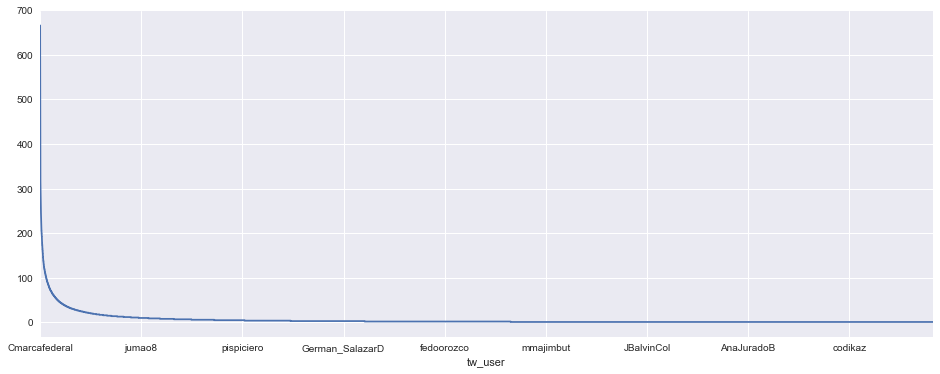

In [5]:
# ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
ids_freqs.plot(figsize=(16,6))

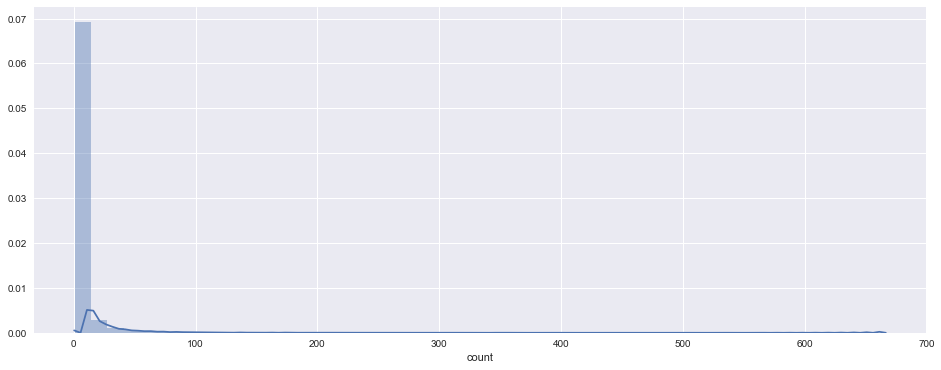

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    88275.000
mean         6.042
std         18.254
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        666.000
Name: count, dtype: float64

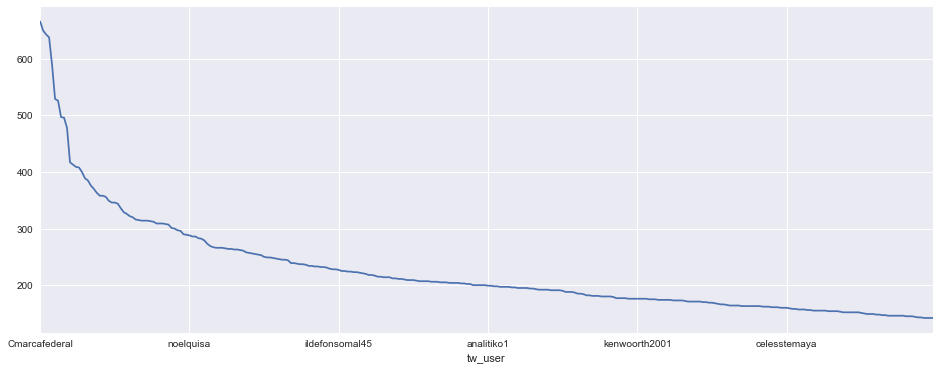

In [8]:
ids_freqs[:300].plot(figsize=(16, 6))

In [9]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
Cmarcafederal      666
PORMIPATRIAYA      650
pierrealee         643
NANACHAGU          638
TWITERM99417410    589
abel3131           529
CarrillonavasG     526
marco_caldon       497
valderramaangel    496
nenoriega5         478
AbCarrymar         417
biolucho2005       413
GusDuque1          409
Yaniracolombia     408
waltermunevar      400
DieGatto1          389
VictoriaRubian5    385
lguzmangomez       376
diegopfaff         370
Kinopodia          363
jaramillo_diana    358
lugicas            358
jjolivella         356
josecastano0904    349
SenorCaicedo       346
macdonal5          346
Amparoc66          344
juansex11151175    336
Santifer57         329
cesar_garcia_nt    326
Monyrica           322
SGTBerkoff1981     320
Gustavo68831299    316
LuisCarlosFV2      315
krlosgiraldo1      314
ramiropinzon56     314
AdamSmithFree      314
MACMontt           313
GPATTYVT           312
jose_amed          309
OctavioLopezSie    309
GladysBecerra1     309
Barreja            308
Dav

In [10]:
ids_freqs.to_csv("freqs_tweets.csv")

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

30974

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 31040


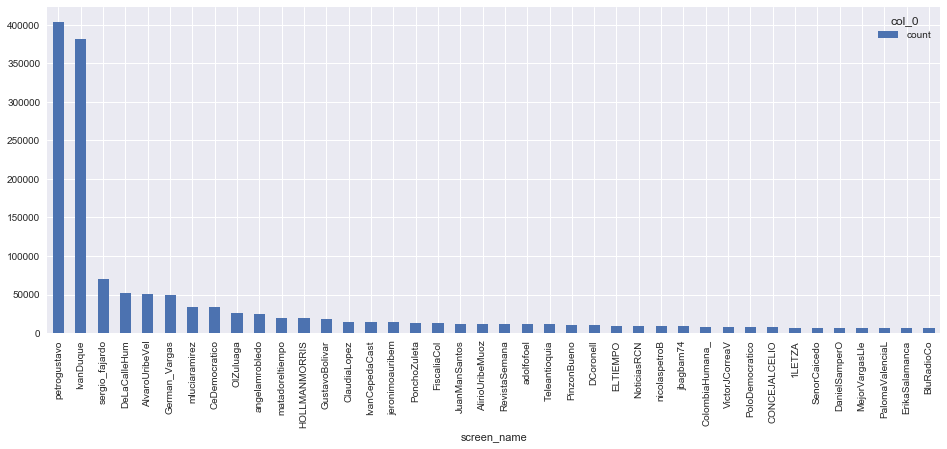

In [14]:
ments_freq[:40].plot(kind='bar', figsize=(16,6))

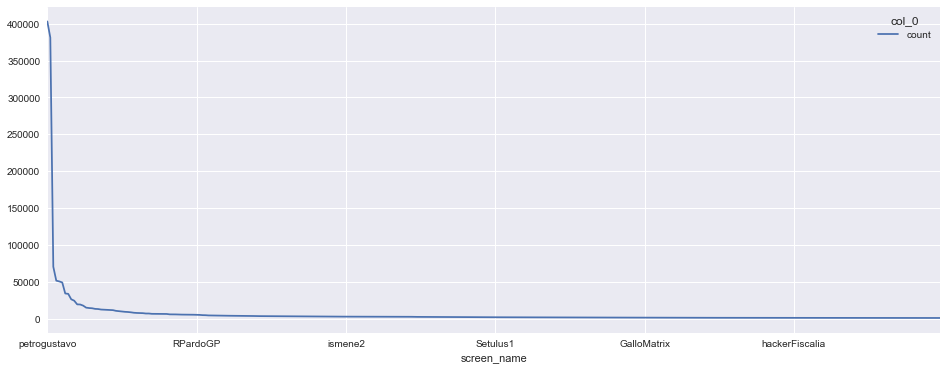

In [15]:
ments_freq[:300].plot(figsize=(16, 6))

In [16]:
(ments_freq[:200])#40

col_0,count
screen_name,
petrogustavo,403078
IvanDuque,381210
sergio_fajardo,70448
DeLaCalleHum,51541
AlvaroUribeVel,50532
German_Vargas,49106
mluciaramirez,34168
CeDemocratico,33662
OIZuluaga,26291


### Clustering Candidatos

In [17]:
scr_nm_cands=["DeLaCalleHum", "ClaraLopezObre",
              "MoralesViviane",
              "sergio_fajardo","ClaudiaLopez",
              "VotoenblancoCo",
              "piedadcordoba","JaimeAraujoR",
              "prjorgetrujillo",
              "German_Vargas","PinzonBueno",
              "IvanDuque","mluciaramirez",
              "petrogustavo","angelamrobledo"
              ]

#[ments_df.loc[ments_df.screen_name==nm_cand].iloc[0:1,0] for nm_cand in scr_nm_cands]
id_str_cand=["823348278830002177","126832572",
             "86622012",
             "25185308","137908875",
             "910144193586188288",
             "34798360","2542586322",
             "232344683",
             "20456814","3401638840",
             "77653794","198984928",
             "49849732","165748292"
             ]

cands_mntns=np.array([[cand in tw_mntns for cand in id_str_cand]for tw_mntns in mentioned_ids])
cands_mntns.shape


(533021, 15)

In [18]:
df_cands_mntns=pd.DataFrame(cands_mntns,columns=scr_nm_cands)

petrogustavo       249968
IvanDuque          240593
sergio_fajardo      46630
DeLaCalleHum        32947
German_Vargas       31617
mluciaramirez       24170
angelamrobledo      16464
ClaudiaLopez        10440
PinzonBueno          6411
piedadcordoba        2582
MoralesViviane       1699
ClaraLopezObre       1358
JaimeAraujoR           21
VotoenblancoCo          5
prjorgetrujillo         4
dtype: int64


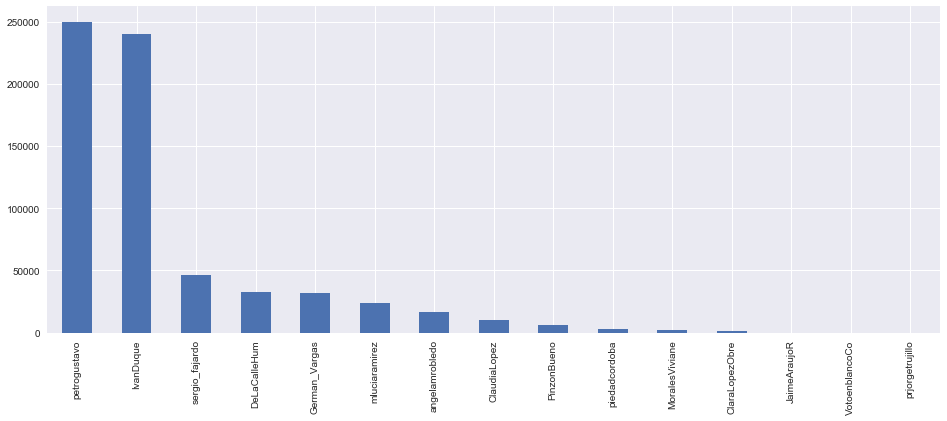

In [19]:
plt.figure(figsize=(16,6))
print (df_cands_mntns.sum(axis=0).sort_values(ascending=False))
df_cands_mntns.sum(axis=0).sort_values(ascending=False).plot(kind="bar")

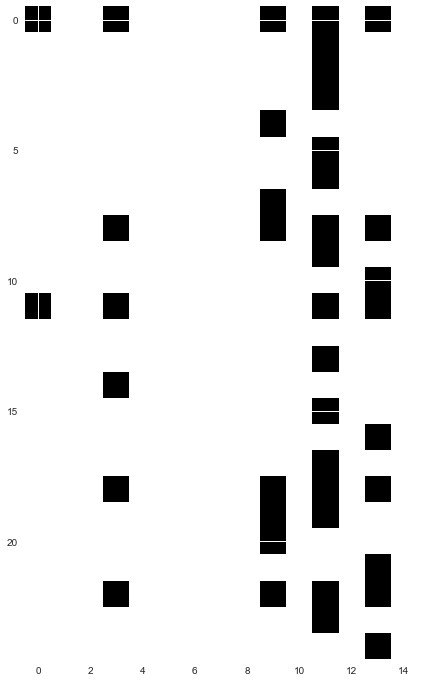

In [20]:
plt.figure(figsize=(15,12))
plt.imshow(df_cands_mntns.iloc[:25,:], cmap=plt.cm.gray_r, interpolation='nearest')

In [21]:
cands_ward= hierarchy.linkage(df_cands_mntns.transpose(), 'ward')

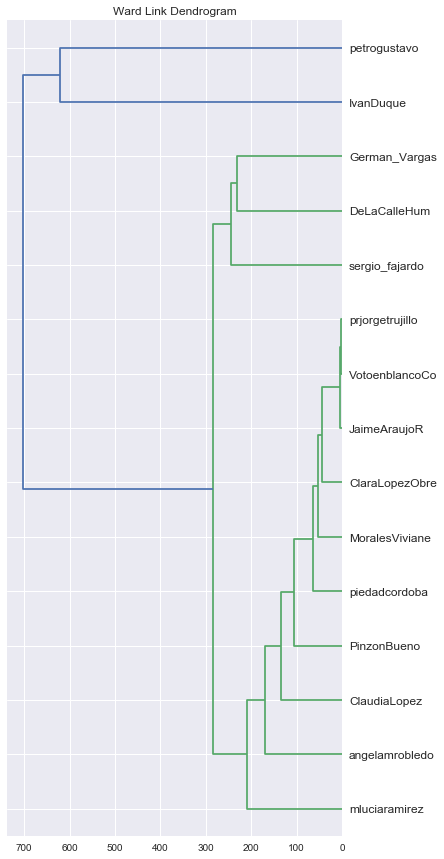

In [22]:
#max_d = 10
plt.figure(figsize=(6,15))
#plt.figure()
dn = hierarchy.dendrogram(cands_ward,orientation="left", labels=scr_nm_cands)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram')
#plt.savefig('dendrograma_ward_link.jpg')
plt.show()

### Clustering Nexos

In [23]:
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns ]), columns="count").sort_values(ascending=False, by="count")

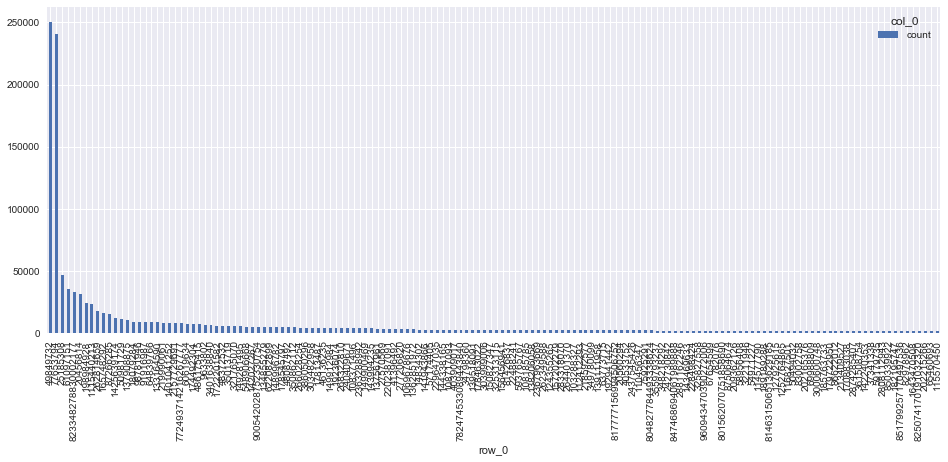

In [24]:
id_ments[:150].plot(kind="bar",figsize=(16,6))

In [25]:
top_n=200

In [26]:
ments_ids_top=list(id_ments.index[:top_n])

In [27]:
mntns_top_ocurr=np.array([[cand in tw_mntns for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [28]:
mntns_top_ocurr.shape

(533021, 200)

In [29]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [30]:
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top)

petrogustavo       249968
IvanDuque          240593
sergio_fajardo      46630
AlvaroUribeVel      35644
DeLaCalleHum        32947
German_Vargas       31617
mluciaramirez       24170
CeDemocratico       23418
OIZuluaga           17477
angelamrobledo      16464
HOLLMANMORRIS       15120
matadoreltiempo     11860
GustavoBolivar      11574
ClaudiaLopez        10440
RevistaSemana        9149
IvanCepedaCast       8959
jeronimoauribem      8728
JuanManSantos        8687
PonchoZuleta         8590
FiscaliaCol          8089
dtype: int64


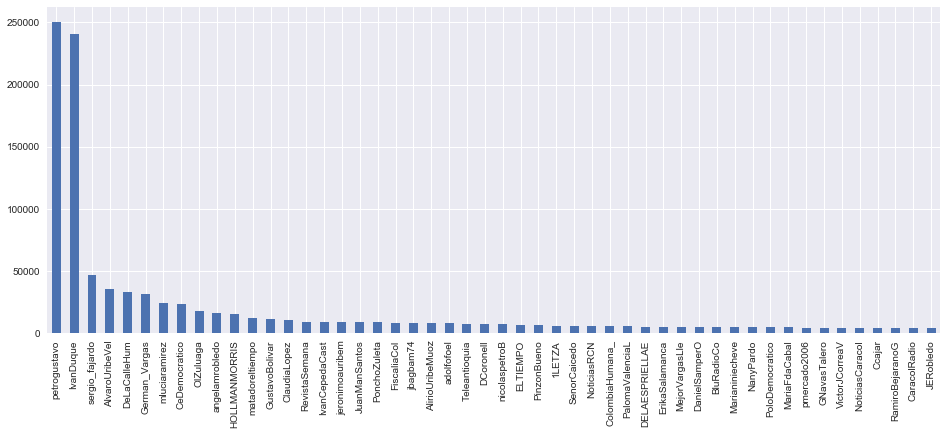

In [31]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")

In [32]:
mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

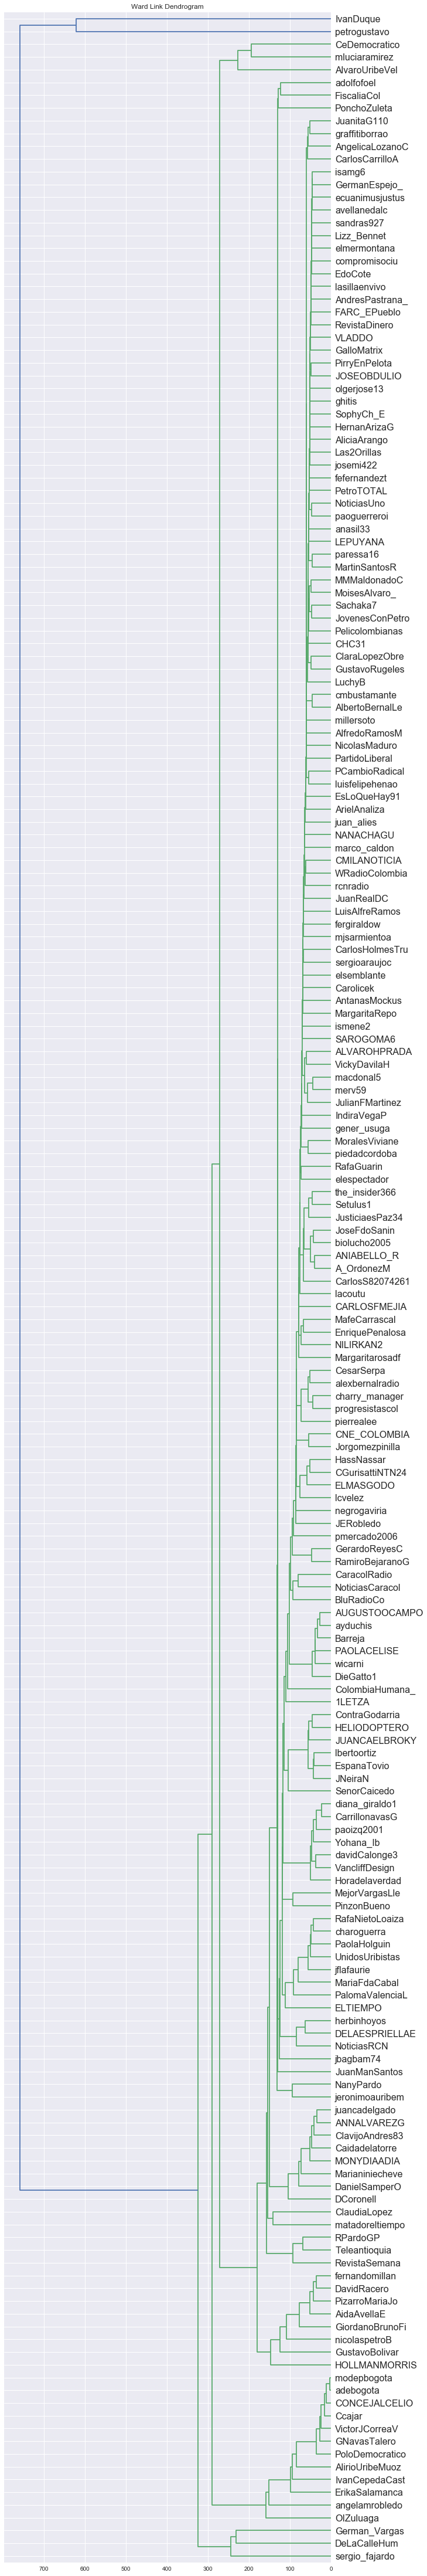

In [33]:
#max_d = 10
plt.figure(figsize=(10,80))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.jpg')
plt.show()